# Stock Ticker Data Retreival Project

## The goal of this project is to allow the user to pull stock related data via user inputs

### This project incorporates Python concepts of:
- Pulling data via APIs
- Reading API data in JSON format
- Loops
- Error and exception handling
- Data visualization


## Function 1: validate_ticker()

### This function takes the input from function 2 and returns either a True or False Statement. Function 1 exists to check if the ticker input is valid and if the api returns actual data

In [28]:
def validate_ticker(input1):
    print('\nValidating ticker:' + ' ' + input1)

    #url variables using input1 for symbol
    #api key commented out for safety purposes
    url1 = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={input1}&apikey=blocked'
    url2 = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={input1}&apikey=blocked'
    url3 = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={input1}&apikey=blocked'

    # get request
    r1 = requests.get(url1)
    r2 = requests.get(url2)
    r3 = requests.get(url3)

    # data in json format    
    data1 = r1.json()
    data2 = r2.json()
    data3 = r3.json()

    # data within json saved to respective variables
    weekly = data1[ 'Weekly Time Series'] #original code DO NOT DELETE
    global_quote = data2['Global Quote'] #original code DO NOT DELETE
    ticker_name = data3['Name'] #original code DO NOT DELETE
    
    #first check to determine if data is properly pulled and saved. All 3 variables must contain data for later functions to work
    if len(weekly) > 0 and len(global_quote) > 0 and len(ticker_name) > 0:
        return True
    else:
        return False

## Function 2: ticker_input()

### This function takes the ticker input from the user and checks against function 1. If the ticker input passes the validate function, a list of variables are returned.

In [31]:
# Test by pulling from 2 API links instead of just weekly time series. 

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


#1 = Bad input
#2 = aapl

def ticker_input():

    ticker = ''
    ticker = input('Please type in a ticker:')
    ticker = ticker.upper()
    is_valid_ticker = validate_ticker(ticker)

    # if the ticker is invalid, user prompted to try again
    while is_valid_ticker is False:
        ticker = input('There was an issue retreiving this ticker. Please try again.')
        ticker = ticker.upper()        
        is_valid_ticker = validate_ticker(ticker)

    
    url1 =  f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={ticker}&apikey=blocked' #generic url with {ticker}
    url2 = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={ticker}&apikey=blocked'
    url3 = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey=blocked'
    
    r1 = requests.get(url1)
    r2 = requests.get(url2)
    r3 = requests.get(url3)

    data1 = r1.json()
    data2 = r2.json()
    data3 = r3.json()

    weekly = data1[ 'Weekly Time Series'] 
    global_quote = data2['Global Quote'] 
    ticker_name = data3['Name'] 
    
    input_ticker = ticker
    input_weekly = weekly
    input_global_quote = global_quote
    input_ticker_name = ticker_name
    
    output1 = (input_ticker, input_weekly, input_global_quote, input_ticker_name)
    return output1



## Function 3: validate_integer()

### Similar to function 1, this functions acts as a validation for the integer input for function 4. 

In [34]:
def validate_integer(input2):
    if int(input2):
        return True
    else:
        return False

## Function 4: weekly_input()

### This functions takes the validated ticker input and returns trading data. It then prompts the user to add an integer value for getting a range of trading weeks for the visual. 

In [37]:
def weekly_input():
    result = ticker_input() #refers to function 2
    print(f'You chose ticker symbol {result[0]}: {result[3]}\n')
    print(f'Here\'s trading information of {result[0]} from the most recent trading day:\n')

    #prints values one by one for readability
    for key,value in result[2].items():
        print(key,value)
    
    print()      
    
    num_weeks = input('How many trading weeks do you want to see? ')
    num_weeks = int(num_weeks)
    is_valid_integer = validate_integer(num_weeks)

    while is_valid_integer is False:
        num_weeks = input('Please enter a valid number (integers only)')
        num_weeks = int(num_weeks)        
        is_valid_integer = validate_integer(num_weeks)
    
    
    weekly = result[1]
    week_end_list = []
    close_price = []
    
    for i in weekly:
        week_end_list.append(datetime.strptime(i, '%Y-%m-%d'))
        close_price.append(float(weekly[i]['4. close']))

    # variables for summary stats
    sub_week_list = week_end_list[:num_weeks]  
    sub_week_list_min = min(sub_week_list)
    
    sub_close_price = close_price[:num_weeks]
    sub_close_price_max = max(sub_close_price)
    sub_close_price_min = min(sub_close_price)
    
    # summary stats based on data range specified
    print()
    print(f'The earliest week end date time period was {sub_week_list_min}')
    print(f'The maximum price for this time period was {sub_close_price_max}')
    print(f'The minimum price for this time period was {sub_close_price_min}') 
    
    # visualize the pulled data in a line chart
    print()
    plt.plot(sub_week_list, sub_close_price, c = 'orange')
    plt.title(f"End of Trading Week Stock Price: {result[0]}")
    plt.xticks(rotation=90)
    plt.xlabel("Trading Week End Date")
    plt.ylabel("Closing Price")
    plt.show()



# Function 5: final_function()

### This is the last function that runs all previous functions. 

Please type in a ticker: PLTR



Validating ticker: PLTR
You chose ticker symbol PLTR: Palantir Technologies Inc. Class A Common Stock

Here's trading information of PLTR from the most recent trading day:

01. symbol PLTR
02. open 66.0100
03. high 68.2000
04. low 65.0400
05. price 67.2600
06. volume 78148636
07. latest trading day 2025-01-10
08. previous close 68.2300
09. change -0.9700
10. change percent -1.4217%



How many trading weeks do you want to see?  24



The earliest week end date time period was 2024-08-02 00:00:00
The maximum price for this time period was 80.55
The minimum price for this time period was 24.74



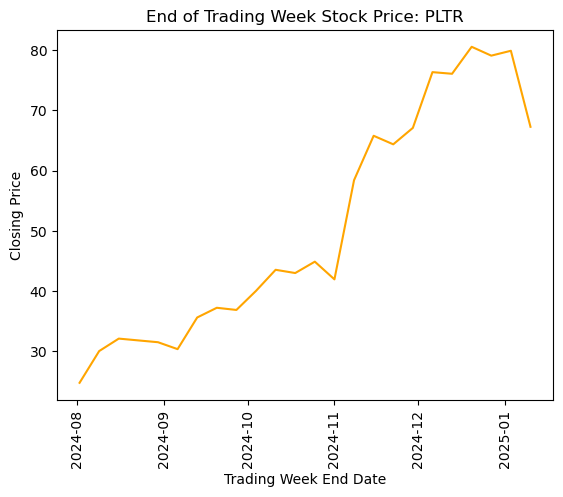

In [40]:
def final_function():
    # function ticker_input() runs first to get the input
    # fuction validate() runs the ticker against validation
    #if ticker is valid then weekly_input is executed, else go back to ticker_input()
    weekly_input()

final_function()

